In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', encoding = "ISO-8859-1")
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


In [5]:
df = df[:-3]
df[-4:]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
341,Whitesboro Village,"3,733",4,0.0,NaN,0,0,4,36,14,21,1,0.0
342,Whitestown Town,"9,141",0,0.0,NaN,0,0,0,77,13,61,3,0.0
343,Woodbury Town,"10,685",3,0.0,NaN,0,2,1,541,9,529,3,NaN
344,Woodridge Village,829,7,0.0,NaN,0,0,7,17,8,9,0,0.0


In [6]:
feats = pd.DataFrame()
feats['PropertyCrime'] = df['Property\ncrime'].str.replace(',','').astype(float)
feats['Population'] = df['Population'].fillna(0)
feats['Population'] = feats['Population'].str.replace(',','').astype(float)
feats['PopSq'] = np.square(feats['Population'])
feats['MurderFull'] = df['Murder and\nnonnegligent\nmanslaughter'].astype(float)
feats['Murder'] = [m if m == 0 else m/m for m in df['Murder and\nnonnegligent\nmanslaughter']  ]
feats['RobberyFull'] = df['Robbery'].fillna(0)
feats['RobberyFull'] = feats['RobberyFull'].str.replace(',','').astype(float)
feats['Robbery'] = [r if r == 0 else r/r for r in feats['RobberyFull']]

In [7]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = feats['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = feats[['Population','PopSq','Murder','Robbery','RobberyFull','MurderFull']]
regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.85344473e-02  -1.66300573e-09  -2.82232955e+01   5.36402271e+01
    4.60567573e+00   4.56911567e+01]]

Intercept: 
 [-35.87851863]

R-squared:
0.999142159147


In [8]:
from sklearn.model_selection import cross_val_score
#data = feats[['Population','PopSq','Murder','Robbery']]
#target = feats['PropertyCrime'].values.reshape(-1, 1)

cross_val_score(regr, X, Y, cv=10)

array([ 0.91180905,  0.98005999,  0.57256212,  0.83815054,  0.27323644,
        0.24142999, -4.10524192,  0.97312633,  0.95055583,  0.89186159])

In [ ]:
# remove outlier
#featsRmvOut1 = pd.DataFrame()
#featsRmvOut1 = feats[feats['Population'] < np.percentile(feats['Population'], 100)].copy()

In [21]:
feats = feats[feats['Population'] < feats['Population'].quantile(0.80)]

In [22]:

Y = feats['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = feats[['Population','PopSq','Murder','Robbery','RobberyFull','MurderFull']]


In [23]:
cross_val_score(regr.fit(X,Y), X, Y, cv=10)

array([ 0.82251608,  0.67686192,  0.71002113,  0.60934081,  0.73780547,
        0.25076877,  0.40433112,  0.83995821,  0.0868002 ,  0.35008303])

In [24]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [25]:
linear_formula = 'PropertyCrime ~ Population+PopSq+Murder+Robbery+RobberyFull+MurderFull'

In [26]:
lm = smf.ols(formula=linear_formula, data=feats).fit()

In [27]:
initPvals = lm.pvalues
print(initPvals)

Intercept      8.799792e-01
Population     5.428238e-03
PopSq          5.875674e-01
Murder         7.240085e-01
Robbery        1.266289e-02
RobberyFull    3.926944e-19
MurderFull     7.240085e-01
dtype: float64


In [28]:
Y = feats['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = feats[['Population','Murder','Robbery','RobberyFull','MurderFull']]
cross_val_score(regr.fit(X,Y), X, Y, cv=10)

array([ 0.82007608,  0.67281238,  0.73614279,  0.60856411,  0.73742492,
        0.24462864,  0.40331499,  0.84800479,  0.10660809,  0.3526014 ])

In [29]:
linear_formula = 'PropertyCrime ~ Population+Murder+Robbery+RobberyFull+MurderFull'
lm = smf.ols(formula=linear_formula, data=feats).fit()
initPvals = lm.pvalues
print(initPvals)

Intercept      7.178382e-01
Population     1.070405e-11
Murder         7.137954e-01
Robbery        6.272759e-03
RobberyFull    2.384185e-19
MurderFull     7.137954e-01
dtype: float64


In [30]:
Y = feats['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = feats[['Population','RobberyFull','MurderFull']]
cross_val_score(regr.fit(X,Y), X, Y, cv=10)

array([ 0.84071055,  0.65556882,  0.71079319,  0.59853124,  0.75443794,
        0.26845675,  0.37513716,  0.85618858,  0.01436161,  0.33696637])

In [31]:
linear_formula = 'PropertyCrime ~ Population+RobberyFull+MurderFull'
lm = smf.ols(formula=linear_formula, data=feats).fit()
initPvals = lm.pvalues
print(initPvals)

Intercept      2.239379e-01
Population     1.134223e-13
RobberyFull    1.046561e-25
MurderFull     7.159534e-01
dtype: float64


In [32]:
feats.head()

,PropertyCrime,Population,PopSq,MurderFull,Murder,RobberyFull,Robbery
0,12.0,1861.0,3463321.0,0.0,0.0,0.0,0.0
1,24.0,2577.0,6640929.0,0.0,0.0,0.0,0.0
2,16.0,2846.0,8099716.0,0.0,0.0,0.0,0.0
4,223.0,6388.0,40806544.0,0.0,0.0,4.0,1.0
5,46.0,4089.0,16719921.0,0.0,0.0,3.0,1.0


In [34]:
X.head()

,Population,RobberyFull,MurderFull
0,1861.0,0.0,0.0
1,2577.0,0.0,0.0
2,2846.0,0.0,0.0
4,6388.0,4.0,0.0
5,4089.0,3.0,0.0


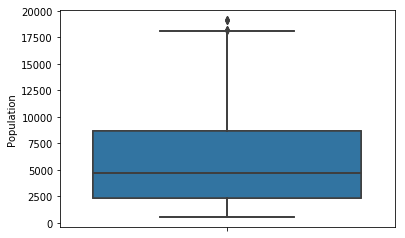

In [37]:
sns.boxplot(y='Population', data=feats)
plt.show()